In [46]:
import pandas as pd
import kagglehub

In [47]:
path = kagglehub.dataset_download("rajanand/crime-in-india")
rape_victims = pd.read_csv(f"{path}/20_Victims_of_rape.csv")
murder_victims = pd.read_csv(f"{path}/32_Murder_victim_age_sex.csv")
# cases_women = pd.read_csv(f"{path}/42_Cases_under_crime_against_women.csv")
# arrests_women = pd.read_csv(f"{path}/43_Arrests_under_crime_against_women.csv")
police_violations = pd.read_csv(f"{path}/35_Human_rights_violation_by_police.csv")
trial_periods = pd.read_csv(f"{path}/29_Period_of_trials_by_courts.csv")
violent_crime_trials = pd.read_csv(f"{path}/28_Trial_of_violent_crimes_by_courts.csv")

In [48]:
# rape_victims.info()

# Fix column names
def clean_column_names(df):
    df.columns = (
        df.columns
        .str.strip()
        .str.lower()
        .str.replace(" ", "_")
        .str.replace("- ", "_")
    )

    return df

rape_victims = clean_column_names(rape_victims)
# rape_victims.info()

In [49]:
# Check for Null data
# rape_victims.isnull().sum()

In [50]:
# Standarize Key Columns
rape_victims['victims_of_rape_total'] = pd.to_numeric(rape_victims['victims_of_rape_total'], errors='coerce').fillna(0)

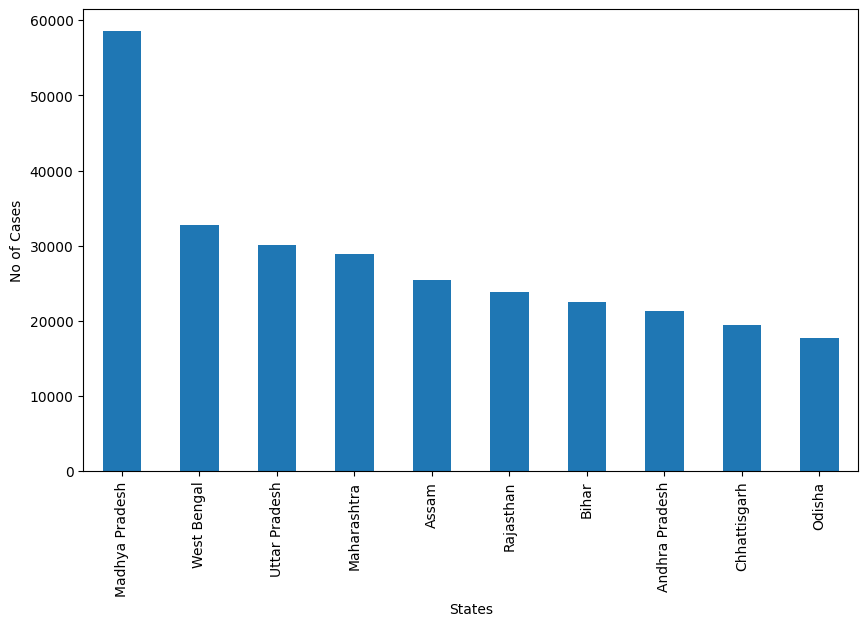

In [51]:
# 1. States with Highest Rape Cases
top_states = rape_victims.groupby('area_name')['rape_cases_reported'].sum().sort_values(ascending=False).head(10)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_states.plot(kind='bar')
plt.xlabel('States')
plt.ylabel('No of Cases')
plt.show()

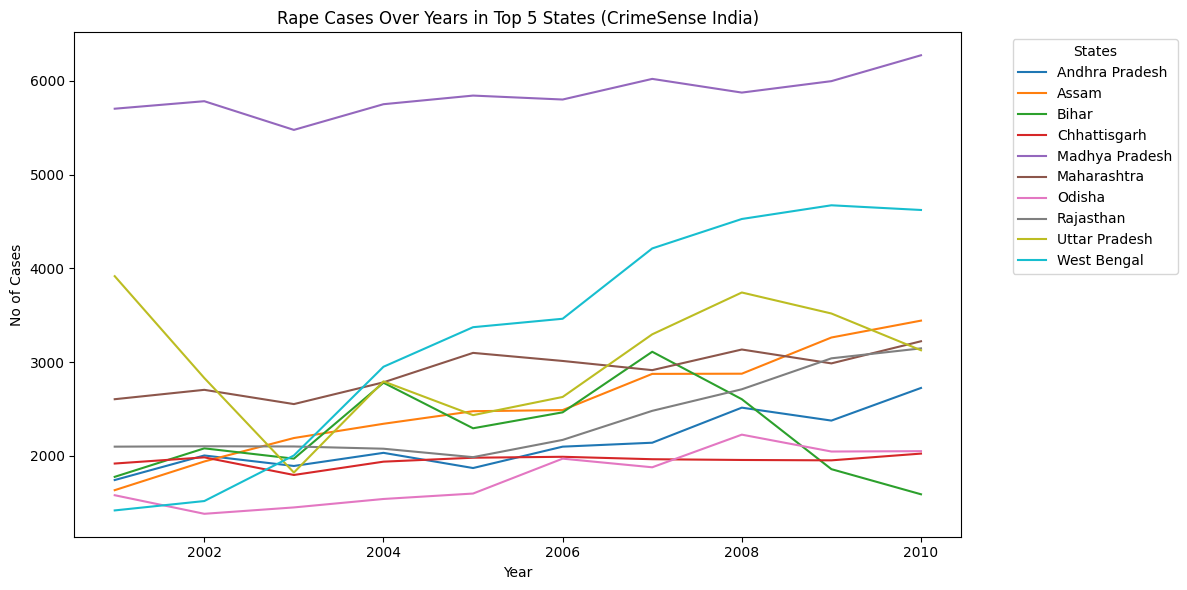

In [66]:
# 2. How Rape Cases have changed over the years in these states
top_states_list = top_states.index.to_list()

rape_top_states = rape_victims[rape_victims['area_name'].isin(top_states_list)]

rape_trends = (
    rape_top_states.groupby(['year', 'area_name'])['victims_of_rape_total'].sum()
    .reset_index()
)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=rape_trends, x='year', y='victims_of_rape_total', hue='area_name', markers='o')
plt.title('Rape Cases Over Years in Top 5 States (CrimeSense India)')
plt.xlabel('Year')
plt.ylabel('No of Cases')
plt.legend(title='States', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [72]:
#  Find the Year with Maximum Reported Rape Cases
max_spike = rape_trends.loc[rape_trends.groupby('area_name')['victims_of_rape_total'].idxmax()].reset_index(drop=True)